In [19]:
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from numpy import load
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

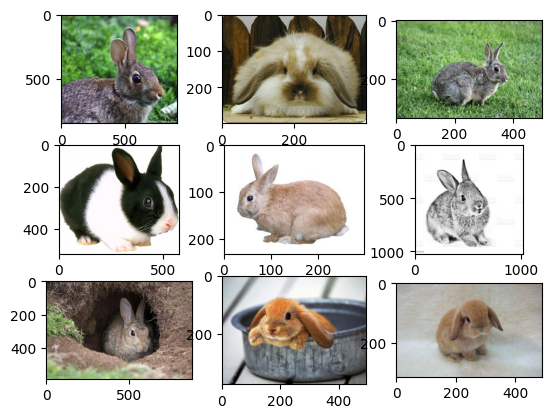

In [11]:
# define location of dataset
folder = 'Dataset/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Rabbit.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

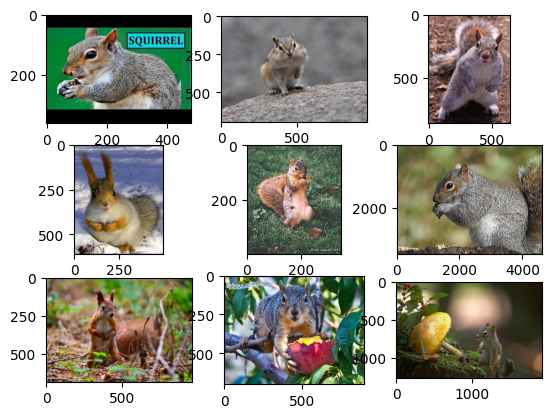

In [12]:
# define location of dataset
folder = 'Dataset/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'Squirrel.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [13]:
# Location of dataset

loc = 'Dataset/'

photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(loc):
 # determine class
 output = 0.0
 if file.startswith('Rabbit'):
 	output = 1.0
 # load image
 photo = load_img(loc + file, target_size=(200, 200))
 # convert to numpy array
 photo = img_to_array(photo)
 # store
 photos.append(photo)
 labels.append(output)

# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('Rabbit_vs_Squirrel_photos.npy', photos)
save('Rabbit_vs_Squirrel_labels.npy', labels)

(200, 200, 200, 3) (200,)


In [18]:
photos = load('Rabbit_vs_Squirrel_photos.npy')
labels = load('Rabbit_vs_Squirrel_labels.npy')

# 200 images of 200 * 200 * 3
# 200 images labels

print(photos.shape)
print(labels.shape)

(200, 200, 200, 3)
(200,)


In [22]:
# create directories
dataset_home = 'dataset_Rabbit_vs_Squirrel/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['Rabbit/', 'Squirrel/']
	for labldir in labeldirs:2
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = 'Dataset/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('Rabbit'):
		dst = dataset_home + dst_dir + 'Rabbit/'  + file
		copyfile(src, dst)
	elif file.startswith('Squirrel'):
		dst = dataset_home + dst_dir + 'Squirrel/'  + file
		copyfile(src, dst)